# Work by: Leopoldo Rojo Romero
Student ID: 2023355

Higher Diploma in Science in Data Analytics for Business

Machine Learning for Business

Dr. Muhammad Iqbal

CCT College

Dublin, Ireland

*NOTE: If you are using the most recent version of Jupyter Notebook (7.0.8), you can navigate this notebook easily using the tabe of contents (Crtl+Shift+K).*

In [1]:
# if needed
# !pip install --upgrade pandas
# !pip install missingno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA 
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
from statsmodels.tsa.stattools import adfuller
import warnings
import missingno as msno

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

## Introduction

## Clustering

#### Scenario

### Load our dataset and explore it by performing an Exploratory Data Analysis (EDA)

By performing an EDA we will understand our dataset, from its shape to its data.

#### Clustering Dataset 

In [3]:
clu = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

#### Dataset information

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

**Obesity levels:**
Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III.

In [4]:
clu.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
clu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
clu.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### Null Values

Before searching for null values, we will replace infinite values to NaN values, this will help us see these values as NaN values in the following '.isnull()' operation, in case that we have them.

In [7]:
clu.replace([np.inf, -np.inf], np.nan, inplace=True)

Percentage of null values in our dataset in each feature.

In [8]:
clu.isnull().mean()*100

Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
NObeyesdad                        0.0
dtype: float64

Lets use the missingno library to visualise the above information of missing values.

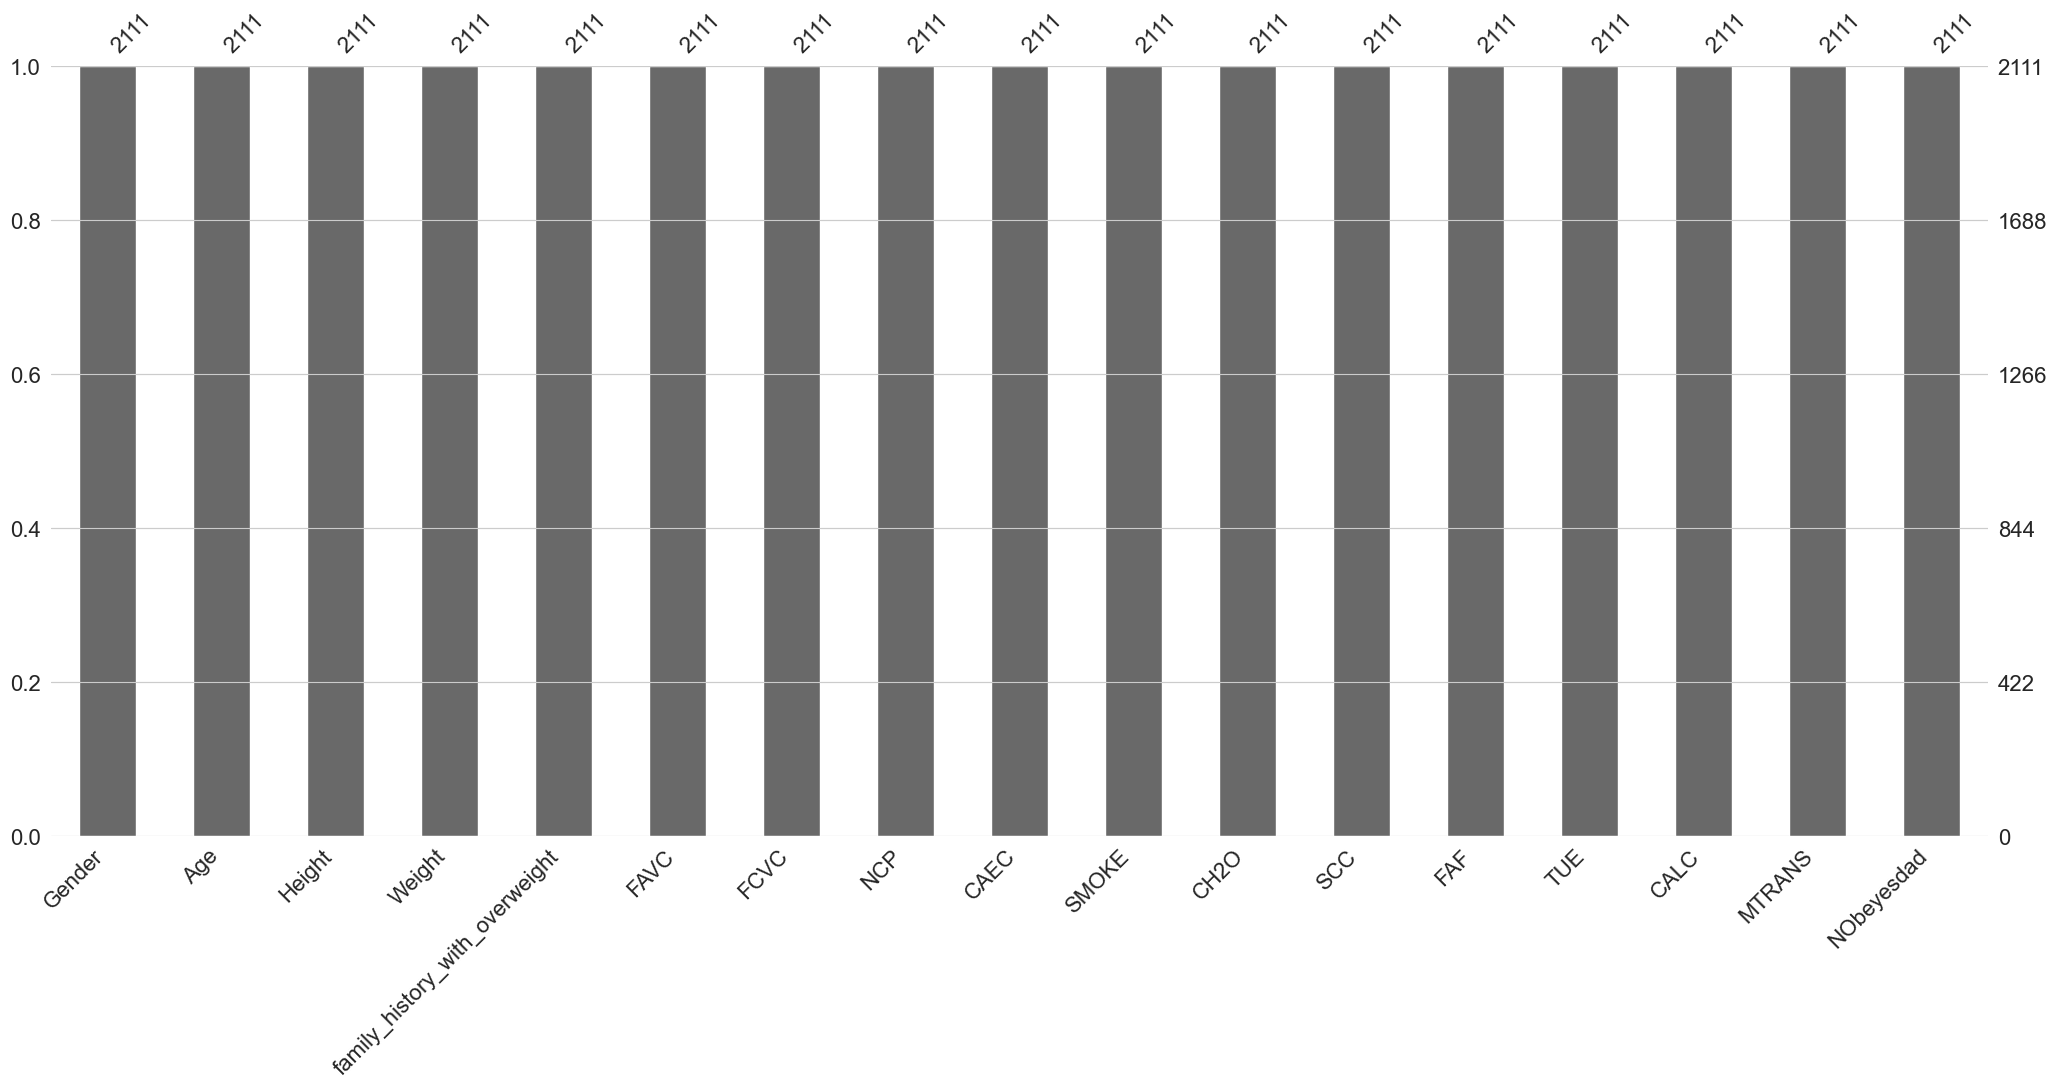

In [9]:
missingv = msno.bar(clu)

#### Outliers

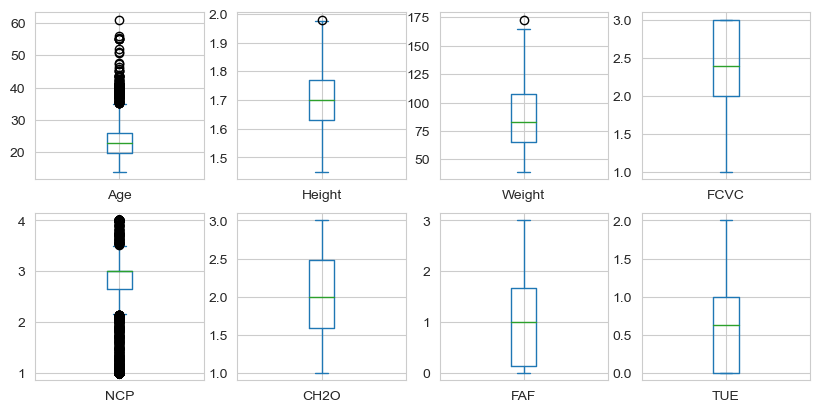

In [10]:
clu.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,10));

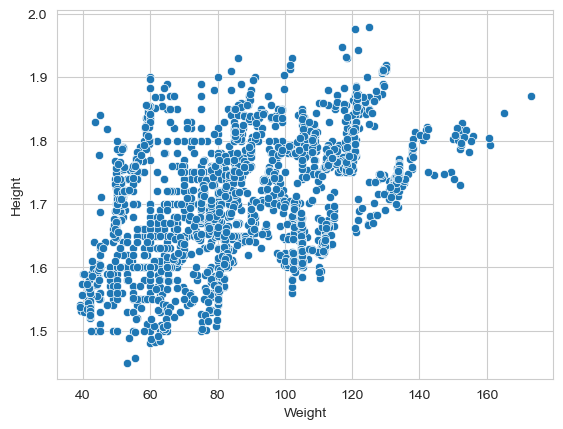

In [11]:
sns.scatterplot(data=clu, x='Weight', y='Height');

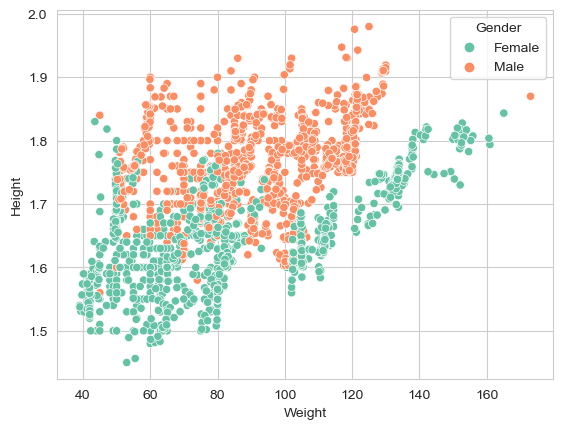

In [12]:
sns.scatterplot(data=clu, x='Weight', y='Height', hue='Gender', palette='Set2');

In [13]:
clu['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

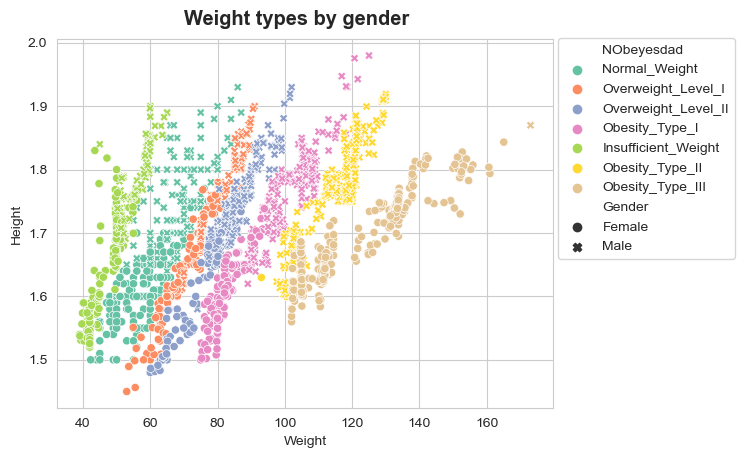

In [14]:
markers = {'Female': 'o', 'Male': 'X'}


ax = sns.scatterplot(data=clu, x='Weight', y='Height', hue='NObeyesdad', palette='Set2',style='Gender', markers=markers);
ax.figure.suptitle('Weight types by gender', y=.94, weight='bold', size='x-large');
plt.legend(loc='upper right', bbox_to_anchor=(1.38,1.02));

#### K-Means clustering

In [15]:
x = clu.iloc[:,2:4]

In [16]:
x

,Height,Weight
0,1.620000,64.000000
1,1.520000,56.000000
2,1.800000,77.000000
3,1.800000,87.000000
4,1.780000,89.800000
...,...,...
2106,1.710730,131.408528
2107,1.748584,133.742943
2108,1.752206,133.689352
2109,1.739450,133.346641


In [17]:
x = clu.iloc[:,2:4].values

In [18]:
kmeans = KMeans(n_clusters=7, max_iter=300, n_init=10, random_state=4)

y_kmeans = kmeans.fit_predict(x)

In [19]:
print(sns.color_palette('Set2').as_hex())

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


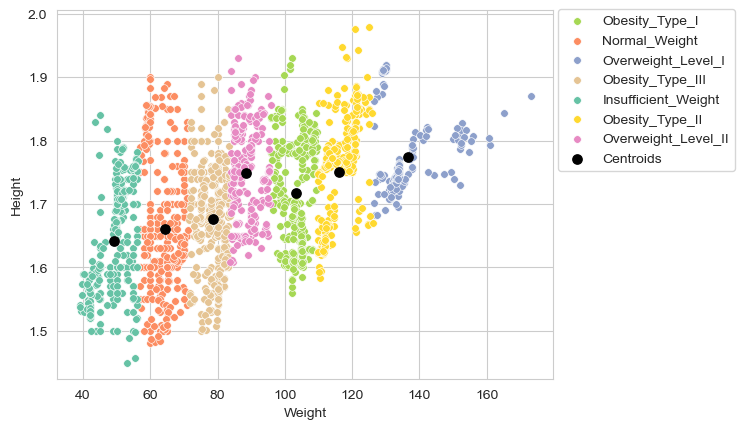

In [20]:
sns.scatterplot(x=x[y_kmeans==0,1], y=x[y_kmeans==0,0], s=30, c='#a6d854', label='Obesity_Type_I')
sns.scatterplot(x=x[y_kmeans==1,1], y=x[y_kmeans==1,0], s=30, c='#fc8d62', label='Normal_Weight')
sns.scatterplot(x=x[y_kmeans==2,1], y=x[y_kmeans==2,0], s=30, c='#8da0cb', label='Overweight_Level_I')
sns.scatterplot(x=x[y_kmeans==3,1], y=x[y_kmeans==3,0], s=30, c='#e5c494', label='Obesity_Type_III')
sns.scatterplot(x=x[y_kmeans==4,1], y=x[y_kmeans==4,0], s=30, c='#66c2a5', label='Insufficient_Weight')
sns.scatterplot(x=x[y_kmeans==5,1], y=x[y_kmeans==5,0], s=30, c='#ffd92f', label='Obesity_Type_II')
sns.scatterplot(x=x[y_kmeans==6,1], y=x[y_kmeans==6,0], s=30, c='#e78ac3', label='Overweight_Level_II')

plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], s=45, c='black', label='Centroids')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend(loc='upper right', bbox_to_anchor=(1.38,1.02));

In [21]:
print('K-Means clustering: ', silhouette_score(x,y_kmeans))

K-Means clustering:  0.566948867502107


In [22]:
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(clu[['Height','Weight']])

distances, indices = nbrs.kneighbors(clu[['Height','Weight']])

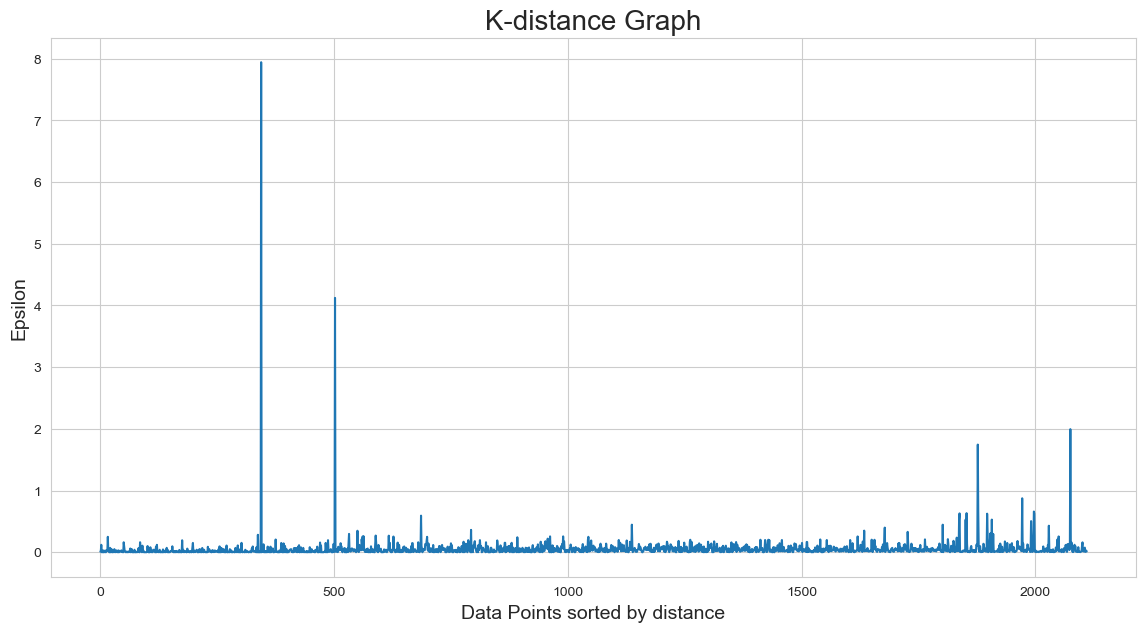

In [23]:
distances = distances[:,1]
plt.figure(figsize = (14,7))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

In [24]:
db_parameters = [[0.1,5],[0.2,5],[0.3,5],[0.4,5],[0.5,5],[0.1,4],[0.2,4],[0.3,4],[0.4,4],[0.5,4],
                [0.1,6],[0.2,6],[0.3,6],[0.4,6],[0.5,6],[0.1,7],[0.2,7],[0.3,7],[0.4,7],[0.5,7]]
for ep,min_sample in db_parameters:
    db = DBSCAN(eps=ep, min_samples=min_sample)
    db_clusters = db.fit_predict(x)
    print('Eps: ', ep, 'Min Samples: ', min_sample)
    print('DBSCAN clustering: ', silhouette_score(x,db_clusters))

Eps:  0.1 Min Samples:  5
DBSCAN clustering:  0.18136659754942785
Eps:  0.2 Min Samples:  5
DBSCAN clustering:  0.4818863850199636
Eps:  0.3 Min Samples:  5
DBSCAN clustering:  0.36766080990163674
Eps:  0.4 Min Samples:  5
DBSCAN clustering:  0.3177059018331216
Eps:  0.5 Min Samples:  5
DBSCAN clustering:  0.34432108683818063
Eps:  0.1 Min Samples:  4
DBSCAN clustering:  0.2839686817843938
Eps:  0.2 Min Samples:  4
DBSCAN clustering:  0.4840837409320994
Eps:  0.3 Min Samples:  4
DBSCAN clustering:  0.3821326413013401
Eps:  0.4 Min Samples:  4
DBSCAN clustering:  0.146757389507787
Eps:  0.5 Min Samples:  4
DBSCAN clustering:  0.06725762314127876
Eps:  0.1 Min Samples:  6
DBSCAN clustering:  0.09013771686747274
Eps:  0.2 Min Samples:  6
DBSCAN clustering:  0.4438476945591641
Eps:  0.3 Min Samples:  6
DBSCAN clustering:  0.341297444333096
Eps:  0.4 Min Samples:  6
DBSCAN clustering:  0.33860742771951224
Eps:  0.5 Min Samples:  6
DBSCAN clustering:  0.33775730481074695
Eps:  0.1 Min Sample

In [25]:
db_clusters.max()

13

In [26]:
dbscan = DBSCAN(eps=0.2, min_samples=4)
dbscan.fit(clu[['Height','Weight']])

DBSCAN(eps=0.2, min_samples=4)

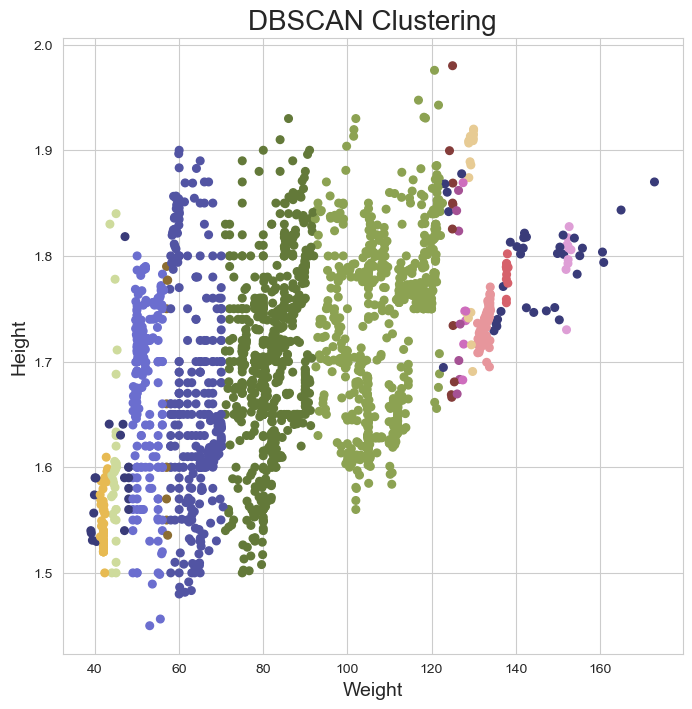

In [27]:
plt.figure(figsize = (8, 8))
plt.scatter(x=clu['Weight'], y=clu['Height'], c = db_clusters, cmap = 'tab20b', s = 30)
plt.title('DBSCAN Clustering', fontsize = 20)
plt.xlabel('Weight', fontsize = 14)
plt.ylabel('Height', fontsize = 14)
plt.show()

## Time Series

#### Scenario

### Load our dataset and explore it by performing an Exploratory Data Analysis (EDA)

By performing an EDA we will understand our dataset, from its shape to its data.

#### Time Series Dataset

In [28]:
time_s = pd.read_csv('LMT.csv')

In [29]:
time_s.head(-5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,13.381902,14.877301,12.500000,14.455521,4.971642,23540786
1,1985-02-01,14.263804,16.411043,13.918712,15.529141,5.340889,29822480
2,1985-03-01,15.644172,16.334356,14.110429,14.838957,5.118644,22144528
3,1985-04-01,14.915644,15.184049,13.957055,14.455521,4.986383,15230068
4,1985-05-01,14.493865,16.372700,13.650307,15.835890,5.462530,22593430
...,...,...,...,...,...,...,...
463,2023-08-01,447.029999,457.670013,442.299988,448.350006,439.003357,19348300
464,2023-09-01,450.320007,451.890015,405.720001,408.959991,403.107574,23734800
465,2023-10-01,408.959991,455.130005,393.769989,454.640015,448.133911,37176800
466,2023-11-01,456.329987,458.220001,439.679993,447.769989,441.362183,25202500


In [30]:
time_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       473 non-null    object 
 1   Open       473 non-null    float64
 2   High       473 non-null    float64
 3   Low        473 non-null    float64
 4   Close      473 non-null    float64
 5   Adj Close  473 non-null    float64
 6   Volume     473 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 26.0+ KB


In [31]:
time_s.describe()

,Open,High,Low,Close,Adj Close,Volume
count,473.000000,473.000000,473.000000,473.000000,473.000000,4.730000e+02
mean,119.302216,125.388795,113.927337,120.181333,96.883033,3.274414e+07
std,133.628778,140.097818,128.027841,134.335934,128.991893,1.918104e+07
min,7.783742,8.205521,7.592025,7.860429,3.181921,1.247205e+06
25%,21.000000,22.200920,19.670244,21.088957,10.355659,2.030000e+07
50%,60.500000,61.970001,57.349998,60.599998,35.095600,2.899053e+07
75%,163.880005,171.360001,160.360001,166.970001,128.106201,4.314130e+07
max,486.519989,508.100006,473.670013,486.679993,470.197845,1.462322e+08


#### Null Values

Before searching for null values, we will replace infinite values to NaN values, this will help us see these values as NaN values in the following '.isnull()' operation, in case that we have them.

In [32]:
time_s.replace([np.inf, -np.inf], np.nan, inplace=True)

Percentage of null values in our dataset in each feature.

In [33]:
time_s.isnull().mean()*100

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

Lets use the missingno library to visualise the above information of missing values.

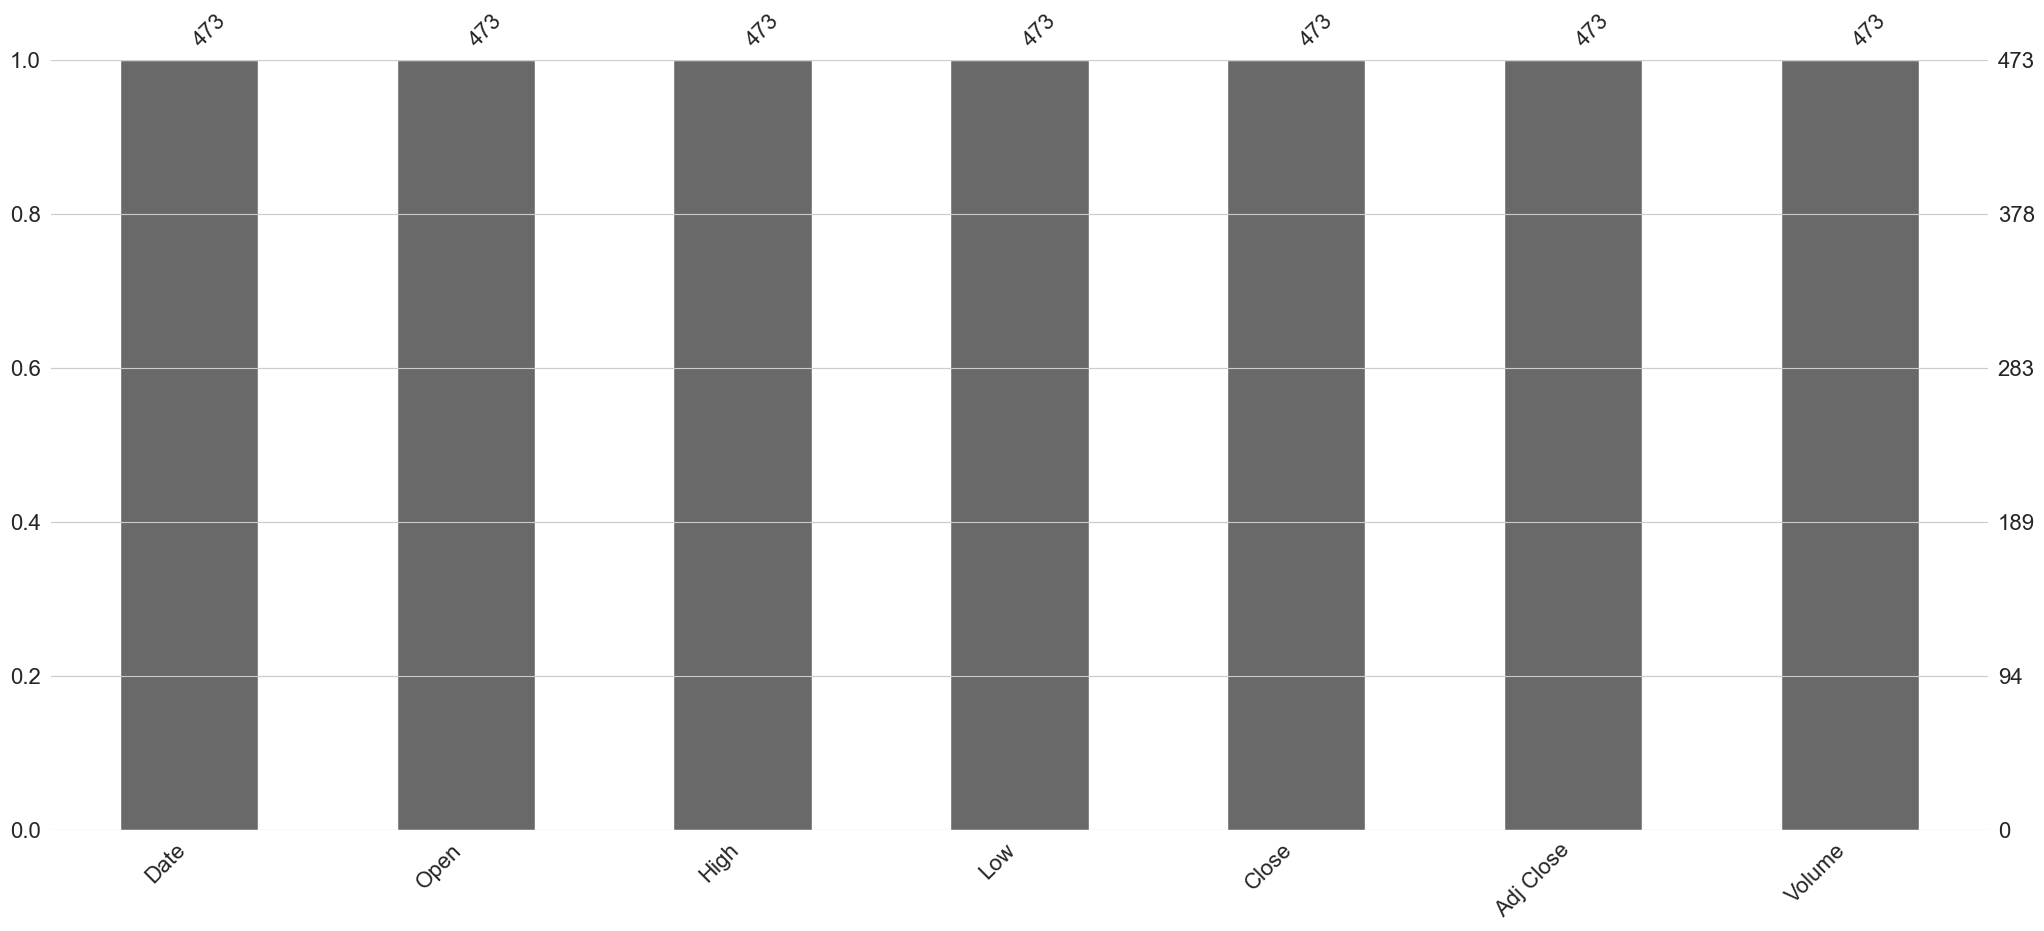

In [34]:
missingv2 = msno.bar(time_s)

In [35]:
def plot_time_s(xt, nlag = 30, fig_size = (10,8)):
    if not isinstance(xt, pd.Series):
        xt = pd.Series(Xt)
    plt.figure(figsize = fig_size)
    layout = (2,2)

    ax_xt = plt.subplot2grid(layout, (0,0), colspan = 2) # It will take 2 column spaces
    ax_acf = plt.subplot2grid(layout, (1,0))
    ax_pacf = plt.subplot2grid(layout, (1,1))

    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time series', fontdict = {'fontsize':18})
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout() # Adjust the padding between and around subplots
    return None

In [36]:
time_s.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,13.381902,14.877301,12.500000,14.455521,4.971642,23540786
1,1985-02-01,14.263804,16.411043,13.918712,15.529141,5.340889,29822480
2,1985-03-01,15.644172,16.334356,14.110429,14.838957,5.118644,22144528
3,1985-04-01,14.915644,15.184049,13.957055,14.455521,4.986383,15230068
4,1985-05-01,14.493865,16.372700,13.650307,15.835890,5.462530,22593430


In [37]:
# Lets put our Date column as an index
time_s['Date'] = pd.to_datetime(time_s['Date'], format = '%Y-%m-%d') # Year - Month - Day
time_s.index = time_s['Date']
time_s.drop('Date', axis = 1, inplace = True)

In [38]:
time_s.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1985-01-01,13.381902,14.877301,12.500000,14.455521,4.971642,23540786
1985-02-01,14.263804,16.411043,13.918712,15.529141,5.340889,29822480
1985-03-01,15.644172,16.334356,14.110429,14.838957,5.118644,22144528
1985-04-01,14.915644,15.184049,13.957055,14.455521,4.986383,15230068
1985-05-01,14.493865,16.372700,13.650307,15.835890,5.462530,22593430


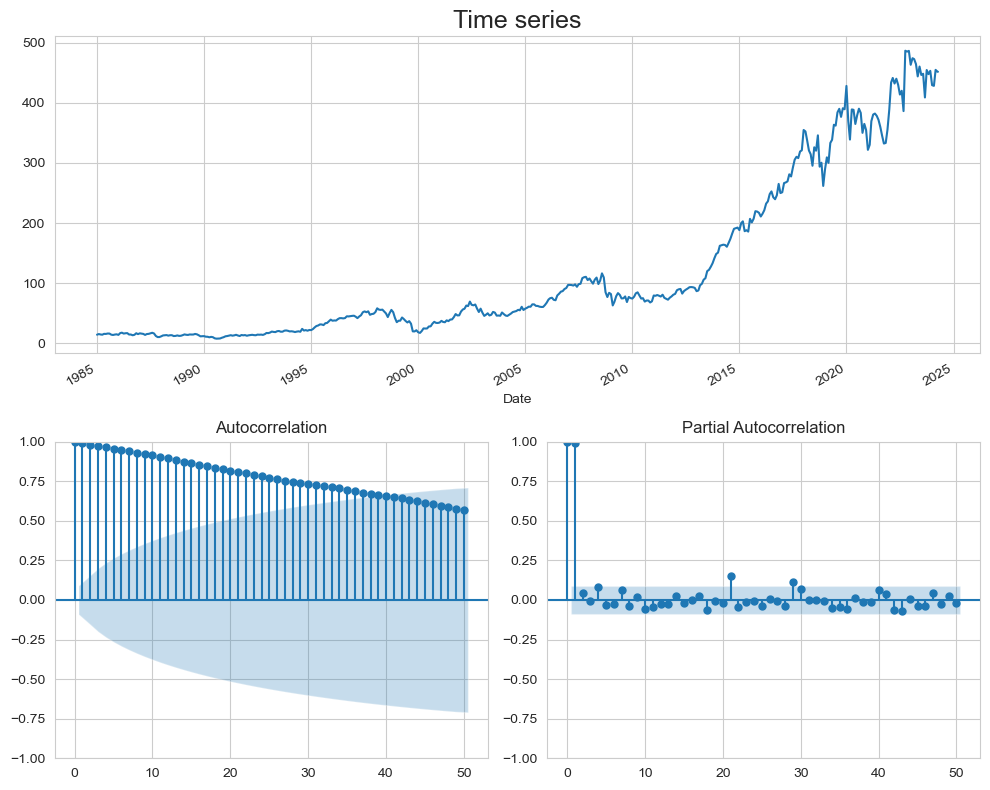

In [39]:
plot_time_s(time_s['Close'], nlag = 100)

In [40]:
adf_result = adfuller(time_s.Close.to_list())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: 2.992361
p-value: 1.000000


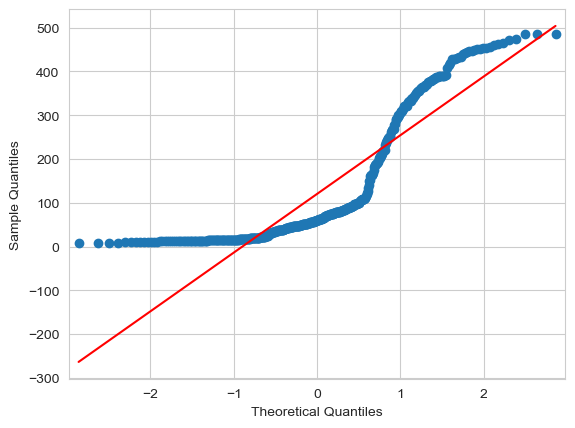

In [41]:
x = sm.qqplot(time_s['Close'], line = 's')

In [42]:
model = ARIMA(time_s['Close'], order = (1,1,0))

results_AR = model.fit()

In [43]:
time_s['Close']

Date
1985-01-01     14.455521
1985-02-01     15.529141
1985-03-01     14.838957
1985-04-01     14.455521
1985-05-01     15.835890
                 ...    
2024-01-01    429.410004
2024-02-01    428.239990
2024-03-01    454.869995
2024-04-01    451.709991
2024-04-10    451.709991
Name: Close, Length: 473, dtype: float64

In [44]:
first_differencing = time_s['Close'].diff(1)
first_differencing

Date
1985-01-01          NaN
1985-02-01     1.073620
1985-03-01    -0.690184
1985-04-01    -0.383436
1985-05-01     1.380369
                ...    
2024-01-01   -23.829986
2024-02-01    -1.170014
2024-03-01    26.630005
2024-04-01    -3.160004
2024-04-10     0.000000
Name: Close, Length: 473, dtype: float64

In [45]:
first_differencing = time_s['Close'].diff(1).dropna()
first_differencing

Date
1985-02-01     1.073620
1985-03-01    -0.690184
1985-04-01    -0.383436
1985-05-01     1.380369
1985-06-01    -0.115031
                ...    
2024-01-01   -23.829986
2024-02-01    -1.170014
2024-03-01    26.630005
2024-04-01    -3.160004
2024-04-10     0.000000
Name: Close, Length: 472, dtype: float64

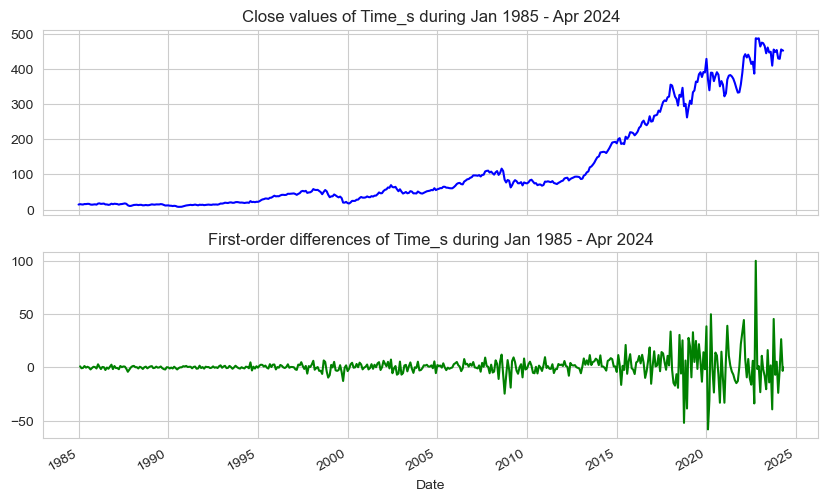

In [46]:
fig, ax = plt.subplots(2, sharex = True);
fig.set_size_inches(10, 6);
time_s['Close'].plot(ax = ax[0], color = 'b');
ax[0].set_title('Close values of Time_s during Jan 1985 - Apr 2024');
first_differencing.plot(ax = ax[1], color = 'g');
ax[1].set_title('First-order differences of Time_s during Jan 1985 - Apr 2024');

ADF Statistic: -6.394018
p-value: 0.000000


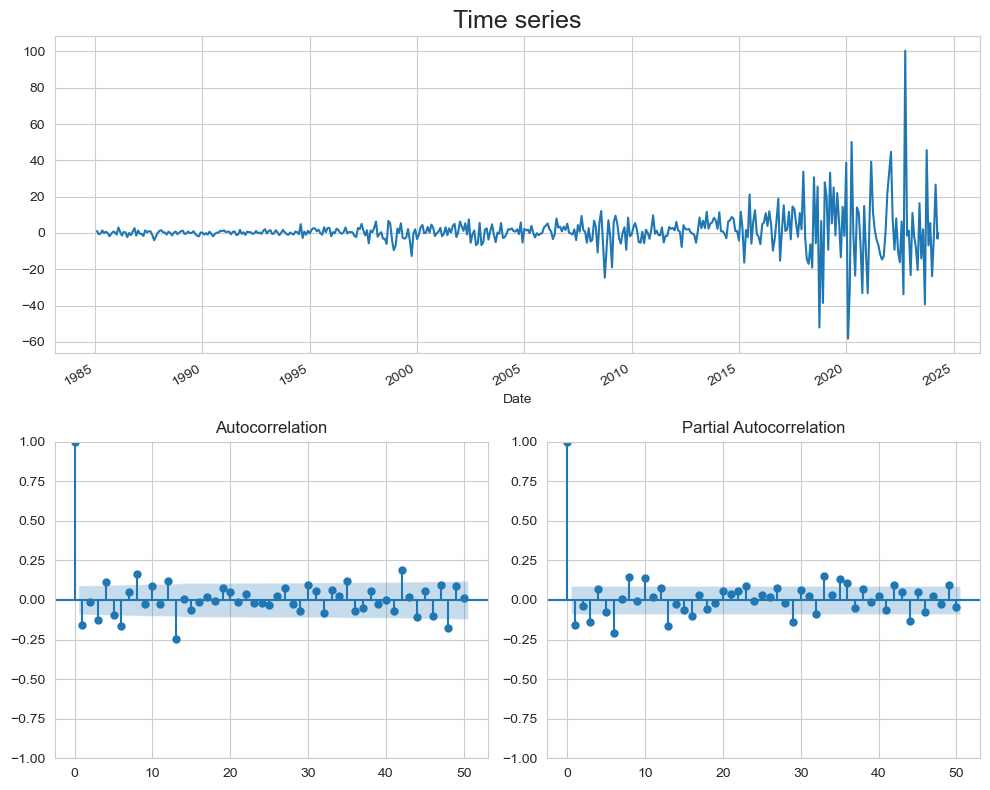

In [47]:
plot_time_s(first_differencing, nlag = 50)
adf_result = adfuller(first_differencing)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

In [48]:
# Search for the best AIC values
aicValues = []

for d in range(1,3):
    for ari in range(0,3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(time_s['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit = arima_obj.fit()
                aicValues.append([ari, d, maj, arima_obj_fit.aic])
                
            except ValueError:
                pass

print(aicValues)
                

[[0, 1, 0, 3599.2366556937604], [0, 1, 1, 3589.772247528775], [0, 1, 2, 3591.200637044409], [1, 1, 0, 3590.5312543508517], [1, 1, 1, 3589.743211644917], [1, 1, 2, 3588.322067250242], [2, 1, 0, 3592.1895370885313], [2, 1, 1, 3591.3860293919497], [2, 1, 2, 3585.9906839808154], [0, 2, 0, 3984.87234274542], [0, 2, 1, 3597.005819291574], [0, 2, 2, 3585.3853420221676], [1, 2, 0, 3807.30151179305], [1, 2, 1, 3586.7638622057866], [1, 2, 2, 3587.5318742543004], [2, 2, 0, 3765.5747444946965], [2, 2, 1, 3587.9698287049923], [2, 2, 2, 3585.5817989421757]]


Best AIC value: [0, 2, 2, 3585.3853420221676]

In [49]:
arima_obj = ARIMA(time_s['Close'].tolist(), order=(0,2,2))

arima_obj_fit = arima_obj.fit()

arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  473
Model:                 ARIMA(0, 2, 2)   Log Likelihood               -1789.693
Date:                Wed, 24 Apr 2024   AIC                           3585.385
Time:                        15:07:19   BIC                           3597.850
Sample:                             0   HQIC                          3590.289
                                - 473                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1749      0.022    -53.386      0.000      -1.218      -1.132
ma.L2          0.1816      0.021      8.559      0.000       0.140       0.223
sigma2       115.8186      2.759     41.978      0.000     110.411     121.226
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              5659.45
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):             135.53   Skew:                             0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
pred = arima_obj_fit.fittedvalues

time_s['ARIMA'] = pred
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues
time_s['diffval'] = diffval
time_s

,Open,High,Low,Close,Adj Close,Volume,ARIMA,diffval
Date,,,,,,,,
1985-01-01,13.381902,14.877301,12.500000,14.455521,4.971642,23540786,0.000000,14.455521
1985-02-01,14.263804,16.411043,13.918712,15.529141,5.340889,29822480,21.683130,15.529141
1985-03-01,15.644172,16.334356,14.110429,14.838957,5.118644,22144528,16.604762,14.838957
1985-04-01,14.915644,15.184049,13.957055,14.455521,4.986383,15230068,15.164417,14.455521
1985-05-01,14.493865,16.372700,13.650307,15.835890,5.462530,22593430,14.502797,15.835890
...,...,...,...,...,...,...,...,...
2024-01-01,454.299988,466.269989,425.570007,429.410004,426.282379,25133300,454.394453,429.410004
2024-02-01,430.230011,435.019989,413.920013,428.239990,425.120880,22940700,435.545311,428.239990
2024-03-01,427.899994,457.109985,424.000000,454.869995,454.869995,23628100,431.115085,454.869995


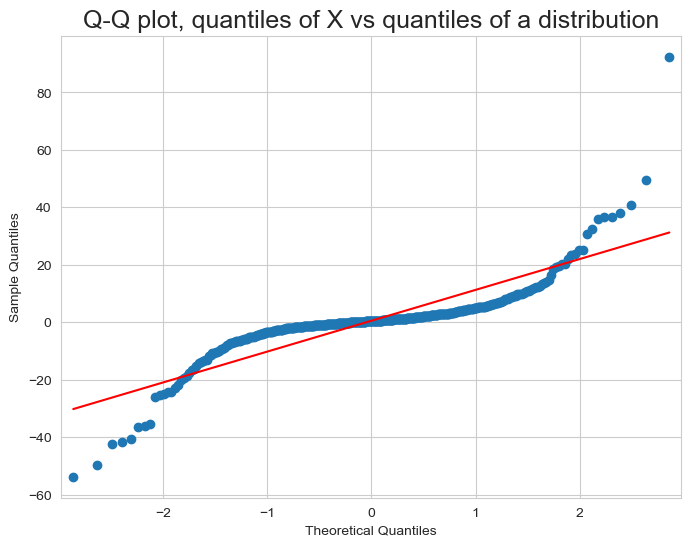

In [51]:
fig, ax = plt.subplots(figsize=(8,6))

residuals = arima_obj_fit.resid[2:]

sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('Q-Q plot, quantiles of X vs quantiles of a distribution', fontdict = {'fontsize':18});
plt.show()

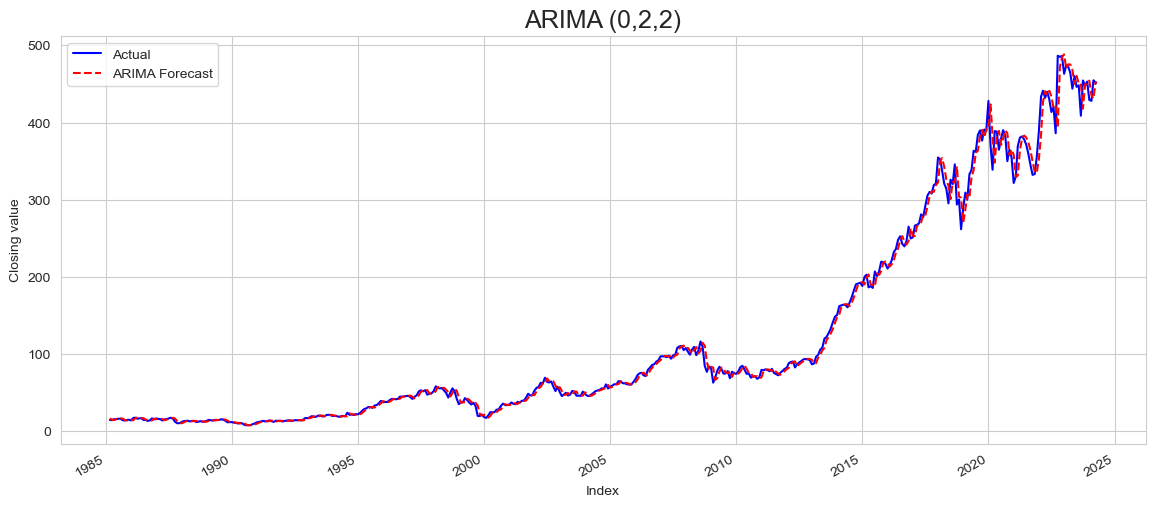

In [52]:
ax_f, axarr = plt.subplots(1, sharex=True);
ax_f.set_size_inches(14, 6);

time_s['diffval'].iloc[2:].plot(color='b', linestyle='-', ax=axarr, label='Actual');
time_s['ARIMA'].iloc[2:].plot(color='r', linestyle='--', ax=axarr, label='ARIMA Forecast');
axarr.set_title('ARIMA (0,2,2)', fontdict = {'fontsize':18});
axarr.set_xlabel('Index');
axarr.set_ylabel('Closing value');
axarr.legend();

In [53]:
result = arima_obj_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 453.730 between 439.939 and 467.522
90.0% Confidence Interval: 453.730 between 436.029 and 471.432
95.0% Confidence Interval: 453.730 between 432.637 and 474.824
99.0% Confidence Interval: 453.730 between 426.010 and 481.451


## Github

## References